# Assignment 3: ICP + Non-linear least squares optimization

TEAM-NAME: Robo-knights

YOUR-ID: 2019111007, 2019112002

YOUR-NAME: Ahana Datta, Pranjali Pathre

## Instructions

* You are not allowed to use any external libraries (other than ones being imported below).
* The deadline for this assignment is *15-09-21* at 11:55pm.
* Plagiarism is *strictly prohibited*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import open3d
import copy
import math

INFO - 2021-10-16 23:41:23,084 - utils - NumExpr defaulting to 8 threads.


# Non Linear Least Squares Optimization

## 1.1 Gradient Descent
Implement the gradient descent algorithm using numpy and what you have learned from class to solve for the parameters of a gaussian distribution.
To understand the task in more detail and look at a worked through example, checkout the subsequent section. You have to implement the same using just numpy functions. You can refer to [Shubodh's notes](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02) on the same to get a better grasp of the concept before implementing it.
* Experiment with the number of iterations.
* Experiment with the learning rate.
* Experiment with the tolerance.

Display your results using matplotlib by plotting graphs for 
* The cost function value vs the number of iterations
* The Ground Truth data values and the predicted data values.

Your plots are expected to contain information similar to the plot below:

<!-- <figure> -->
<img src='./helpers/sample_plt.png' alt=drawing width=500 height=600>

<!-- <figcaption align='center'><b>A sample plot, you can use your own plotting template</b></figcaption>
</figure> -->
<!-- head over to [this page](https://saishubodh.notion.site/Non-Linear-Least-Squares-Solved-example-Computing-Jacobian-for-a-Gaussian-Gradient-Descent-7fd11ebfee034f8ca89cc78c8f1d24d9) -->

## Worked out Example using Gradient Descent

A Gaussian distribution parametrized by $a,m,s$ is given by:

$$ y(x;a,m,s)=a \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right) \tag{1}$$

### Jacobian of Gaussian

$$\mathbf{J}_y=\left[\frac{\partial y}{\partial a} \quad \frac{\partial y}{\partial m} \quad \frac{\partial y}{\partial s}\right] \\
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

## Problem at hand

> Given a set of observations $y_{obs}$ and $x_{obs}$ we want to find the optimum parameters $a,m,s$ which best fit our observations given an initial estimate.

Our observations would generally be erroneous and given to us, but for the sake of knowing how good our model is performing, let us generate the observations ourselves by assuming the actual "actual" parameter values as $a_{gt}=10; m_{gt} =0; s_{gt} =20$ ($gt$ stands for ground truth). We will try to estimate these values based on our observations and let us see how close we get to "actual" parameters. Note that in reality we obviously don't have these parameters as that is exactly what we want to estimate in the first place. So let us consider the following setup, we have:

- Number of observations, $num\_obs = 50$
- Our 50 set of observations would be
    - $x_{obs} = np.linspace(-25,25, num\_obs)$
    - $y_{obs} = y(x_{obs};a_{gt},m_{gt},s_{gt})$  from $(1)$

Reference:

→[linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

- Say we are given initial estimate as:

    $$a_0=10; \quad m_0=13; \quad s_0=19.12$$

### Residual and error to be minimized

Okay, now we have set of observations and an initial estimate of parameters. We would now want to minimize an error that would give us optimum parameters.

The $residual$ would be given by

$$ r(a,m,s) = \left[ a \exp \left(\frac{-(x_{obs}-m)^{2}}{2 s^{2}}\right) - y_{obs}\ \right]$$

where we'd want to minimize $\|r\|^2$. Note that $r$ is a non-linear function in $(a,m,s)$.

Also, note that since $y$ (and $x$) are observations in the above equation, after simplification, we get $\mathbf{J}_r = \mathbf{J}_y$ [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0) (since $y_{obs}$ is a constant).

Let us apply Gradient Descent method for minimization here. From [Table I](https://www.notion.so/From-linear-algebra-to-non-linear-weighted-least-squares-optimization-13cf17d318be4d45bb8577c4d3ea4a02),  

$$\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k})$$

Note that $\mathbf{J_F}$ is the Jacobian of "non-linear least squares" function $\mathbf{F}$ while $\mathbf{J}_r$ is the Jacobian of the residual. 

where $\mathbf{k}$ is $[a,m,s]^T$. 

- Some hyperparameters:
    - Learning rate, $lr = 0.01$
    - Maximum number of iterations, $num\_iter=200$
    - Tolerance, $tol = 1e-15$

## Solution for 1 iteration

To see how each step looks like, let us solve for 1 iteration and for simpler calculations, assume we have 3 observations, 

$$x_{obs}= \left[ -25, 0, 25 \right]^T, y_{obs} = \left[  4.5783, 10, 4.5783 \right]^T. $$

With our initial estimate as $\mathbf{k_0} = [a_0=10, \quad m_0=13, \quad s_0=19.12]^T$, the residual would be 

$$ r(a_0,m_0,s_0) = \left[ a_0 \exp \left(\frac{-(x_{obs}-m_0)^{2}}{2 s_0^{2}}\right) - y_{obs}\ \right]$$

Therefore, $r=[-3.19068466, -2.0637411 , 3.63398058]^T$.

### Gradient Computation

Gradient, $\mathbf{J_F}$=

$$\mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

We have calculated residual already [above](https://www.notion.so/c9e6f71b67a44bb8b366df2fccfc12d0), let us calculate the Jacobian $\mathbf{J_r}$.

$$\mathbf{J}_r
= \left[ \exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right); \frac{a (x-m)}{s^2} \exp\left(\frac{-(x-m)^{2}}{2 s^{2}}\right);  \frac{a (x-m)^2}{s^3}\exp \left(\frac{-(x-m)^{2}}{2 s^{2}}\right)\right]$$

$$\implies \mathbf{J_r} = \left[ \begin{array}{rrr}0.1387649 & 0.79362589, & 0.82123142 \\-0.14424057 & -0.28221715  & 0.26956967 \\0.28667059 & 0.19188405, & 0.16918599\end{array}\right]$$

So ,

$$\mathbf{J_F} = \mathbf{J_r}^{\top} \mathbf{r}(\mathbf{k})$$

$$\mathbf{r}(\mathbf{k}) =  \left[ \begin{array}{r}-3.19068466 \\ -2.0637411 \\ 3.63398058 \end{array} \right]$$

$$ \begin{aligned} \implies \mathbf{J_F} = \left[ \begin{array}{r} 0.89667553 \\ -1.25248392 \\-2.56179392\end{array} \right] \end{aligned}$$

### Update step

$$
\Delta \mathbf{k} = - \alpha \mathbf{J_F} \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
$$

Here, $\alpha$ our learning rate is 0.01.

$$
\Delta \mathbf{k} = - \alpha\times\left[ \begin{array}{r} 
0.89667553 \\ -1.25248392 \\-2.56179392
\end{array} \right] = \left[ \begin{array}{r}
-0.00896676 \\ 0.01252484 \\0.02561794
\end{array}\right]
$$

$$
\mathbf{k}^{1} = \mathbf{k}^{0} + \Delta \mathbf{k} \\ \left[\begin{array}{r} 10 \\ 13 \\ 19.12 \end{array}\right] + \left[\begin{array}{c} 9.99103324 \\ 13.01252484 \\ 19.14561794 \end{array} \right]
$$

With just one iteration with very few observations, we can see that we have gotten *slightly* more closer to our GT parameter  $a_{gt}=10; m_{gt} =0; s_{gt} =20$. Our initial estimate was $[a_0=10, \quad m_0=13, \quad s_0=19.12]$. However, the above might not be noticeable enough: Hence you need to code it for more iterations and convince yourself as follows:

In [2]:
def gaussian(x, a, m, s):
    return a * np.exp(-(x - m)**2/(2*s**2))

def find_residue_gaussian(a, m, s, x, y):
    residue = a * np.exp(-(x - m)**2/(2*s**2)) - y
    return residue  

def calculate_jacobian(a, m, s, x):
    dy_da = np.exp(-(x - m)**2/(2*s**2))
    dy_dm = (a*(x - m)/s**2)*np.exp(-(x - m)**2/(2*s**2))
    dy_ds = (a*(x - m)**2/s**3)*np.exp(-(x - m)**2/(2*s**2))
    return (np.array([dy_da, dy_dm, dy_ds]))

def calculate_J_F(J, r):
    return J@r

def gradient_descent(a0, m0, s0, xobs, yobs, lr, num_iter, tol):
    ini_vec = np.array([a0, m0, s0])
    k = ini_vec
    cost = np.zeros(num_iter)
    stop_iter = num_iter 
    for i in range(num_iter):
        a_curr = k[0]
        m_curr = k[1]
        s_curr = k[2]
        
#       Finding the residue/cost
        r = find_residue_gaussian(a_curr, m_curr, s_curr, xobs, yobs)

        cost[i] = np.linalg.norm(r)**2
#         Calculating the jacobian        
        J_r = calculate_jacobian(a_curr, m_curr, s_curr, xobs)

        J_F = calculate_J_F(J_r, r)
#         Performing the update
        dk = -lr*J_F
        
        k = k + dk

#         Break if the error for all the three goes below the tolerance value. 
        if((abs(dk[0])<2*tol) & (abs(dk[1])<2*tol) & (abs(dk[2])<2*tol)):
            stop_iter = i + 1
            break
    return k[0], k[1], k[2], cost, stop_iter   

def plot1(x, y, title, xlabel, ylabel):
    font1 = {'family':'serif','color':'black','size':14}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.plot(x, y, label = "Loss")
    plt.xlabel(xlabel, fontdict = font2)
    plt.ylabel(ylabel, fontdict = font2)
    plt.title(title, fontdict = font1)
    plt.legend()
    plt.show()
    
def plot2(x, y1, y2, title):
    font1 = {'family':'serif','color':'black','size':14}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.plot(x, y1, label = "Ground Truth", marker='o')
    plt.plot(x, y2, label = "Predicted", marker='o')
    plt.title(title, fontdict = font1)
    plt.legend()
    plt.show()

Pred :  9.999999999049876 -8.691692249112362e-16 20.000000005262155
3.6771505364690136e-17
iter_req:  603


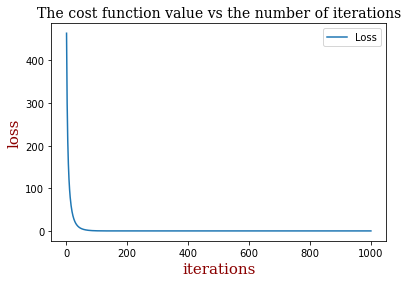

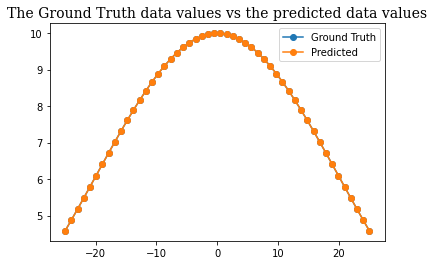

In [3]:
# Setting the paramerters 
lr = 0.03
num_iter = 1000
tol = 10**(-10)
r_iter = np.arange(1, num_iter + 1,1)

# Ground Truth Values
a_gt = 10
m_gt = 0
s_gt = 20

# Set of observations
num_obs = 50
xobs = np.linspace(-25,25,num_obs)
yobs = gaussian(xobs, a_gt, m_gt, s_gt)

# Initial estimate
a0 = 10
m0 = 13
s0 = 19.12

a_pred, m_pred, s_pred, cost, stop_iter = gradient_descent(a0, m0, s0, xobs, yobs, lr, num_iter, tol)
y_pred = gaussian(xobs, a_pred, m_pred, s_pred)
print("Pred : ", a_pred, m_pred, s_pred)
print(cost[stop_iter-1])
print("iter_req: ", stop_iter)
plot1(r_iter, cost, "The cost function value vs the number of iterations", "iterations", "loss")     
plot2(xobs, yobs, y_pred, "The Ground Truth data values vs the predicted data values")     

## 1.2: Another Non-Linear function
Now that you've got the hang of computing the jacobian matrix for a non-linear function via the aid of an example, try to compute the jacobian of a secondary gaussian function by carrying out steps similar to what has been shown above. The function is plotted below:
<img src='./helpers/non_linear.png' alt=drawing width=500 height=600>
Using the computed jacobian, optimise for the four parameters using gradient descent, where the parameters to be estimated are: 

$p_1$ = 2,  $p_2$ = 8,  $p_3$ = 4,  $p_4$ = 8. 

Do this for $x_{obs} = np.linspace(-20,30, num\_obs)$,
where $num\_obs$ is 50.

In [4]:
def make_non_linear(x, p1, p2, p3, p4):
    y = p1 * np.exp(-x / p2) + p3 * np.sin(x / p4)
    return y

def find_residue_non_linear(p1, p2, p3, p4, x, y):
    residue = p1 * np.exp(-x / p2) + p3 * np.sin(x / p4) - y
    return residue  

def calculate_jacobian_non_linear(p1, p2, p3, p4, x):
    dy_dp1 = np.exp(-x / p2)
    dy_dp2 = p1 * x * np.exp(-x / p2)/p2**2
    dy_dp3 = np.sin(x / p4)
    dy_dp4 = - x * p3 * np.cos(x / p4)/p4**2 
    return (np.array([dy_dp1, dy_dp2, dy_dp3, dy_dp4]))

def gradient_descent_II(p1, p2, p3, p4, xobs, yobs, lr, num_iter, tol):
    ini_vec = np.array([p1, p2, p3, p4])
    k = ini_vec
    cost = np.zeros(num_iter)
    stop_iter = num_iter 
    for i in range(num_iter):
        p1_curr = k[0]
        p2_curr = k[1]
        p3_curr = k[2]
        p4_curr = k[3]
        
#         Calculate residue
        r = find_residue_non_linear(p1_curr, p2_curr, p3_curr, p4_curr, xobs, yobs)
        
        cost[i] = np.linalg.norm(r)**2
#         Calculating the jacobian
        J_r = calculate_jacobian_non_linear(p1_curr, p2_curr, p3_curr, p4_curr, xobs)

        J_F = calculate_J_F(J_r, r)

#         Performing the update
        dk = -lr*J_F
        
        k = k + dk
        
#         break once the error reduces below tol for all the three parameters
        if((abs(dk[0])<tol) & (abs(dk[1])<tol) & (abs(dk[2])<tol) & (abs(dk[3])<tol)):
            stop_iter = i + 1
            break
    return k[0], k[1], k[2], k[3], cost, stop_iter

Pred :  2.000011197130983 8.000021151205585 4.000003540751196 7.999995946779353
iter_req:  2000


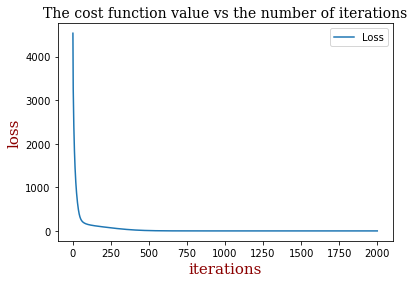

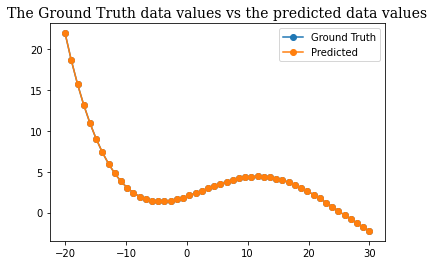

In [5]:
# Setting the paramerters 
lr = 0.001
num_iter = 2000
tol = 10**(-15)
r_iter = np.arange(1, num_iter + 1,1)
# Ground Truth Values
p1_gt = 2
p2_gt = 8
p3_gt = 4
p4_gt = 8

num_obs = 50
xobs = np.linspace(-20,30,num_obs)
yobs = make_non_linear(xobs, p1_gt, p2_gt, p3_gt, p4_gt)

p10 = 0
p20 = 15
p30 = 12
p40 = 3

p1_pred, p2_pred, p3_pred, p4_pred, cost, stop_iter = gradient_descent_II(p10, p20, p30, p40, xobs, yobs, lr, num_iter, tol)
y_pred = make_non_linear(xobs, p1_pred, p2_pred, p3_pred, p4_pred)
print("Pred : ", p1_pred, p2_pred, p3_pred, p4_pred)
print("iter_req: ", stop_iter)
plot1(r_iter, cost, "The cost function value vs the number of iterations", "iterations", "loss")     
plot2(xobs, yobs, y_pred, "The Ground Truth data values vs the predicted data values")  

## 1.3: Different Optimizers

Replace gradient descent with Gauss-Newton and Levenberg Marquardt algorithms and repeat question 1.1. 

To quickly recap, Gauss-Newton and Levenberg Marquardt are alternate update rules to the standard gradient descent. Gauss Newton updates work as:

$$\delta x = -(J^TJ)^{-1}J^Tf(x)$$

Levenberg Marquardt lies somewhere between Gauss Newton and Gradient Descent algorithms by blending the two formulations. As a result, when at a steep cliff, LM takes small steps to avoid overshooting, and when at a gentle slope, LM takes bigger steps:


$$\delta x = -(J^TJ + \lambda I)^{-1}J^Tf(x)$$

In [6]:
def calculate_J_F_Gauss_Newton(J, r):
    return (np.linalg.pinv(J@(J.T)))@J@r

def Gauss_Newton(a0, m0, s0, xobs, yobs, num_iter, tol):
    ini_vec = np.array([a0, m0, s0])
    k = ini_vec
    cost = np.zeros(num_iter)
    stop_iter = num_iter 
    for i in range(num_iter):
        a_curr = k[0]
        m_curr = k[1]
        s_curr = k[2]
        
#       Finding the residue/cost
        r = find_residue_gaussian(a_curr, m_curr, s_curr, xobs, yobs)
    
        cost[i] = np.linalg.norm(r)**2
#         Calculating the jacobian
        J_r = calculate_jacobian(a_curr, m_curr, s_curr, xobs)

        J_F = calculate_J_F_Gauss_Newton(J_r, r)
#         Performing the update
        dk = -J_F
        
        k = k + dk
        
        if(np.linalg.norm(dk) < tol):
            print("dk: ", np.linalg.norm(dk))
            stop_iter = i + 1
            break
    return k[0], k[1], k[2], cost, stop_iter

dk:  0.0
Pred :  10.0 -3.1207167450187305e-16 20.0
iter_req:  8


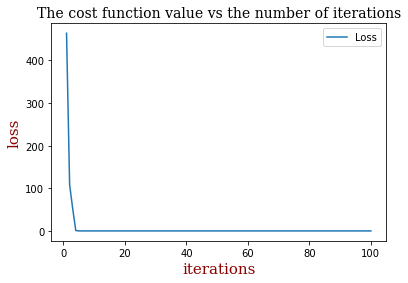

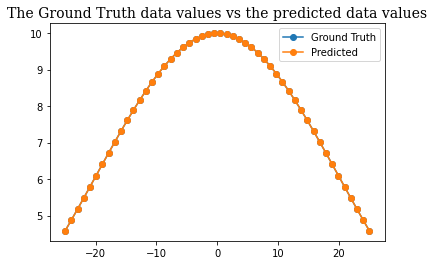

In [7]:
# Setting the paramerters 
num_iter = 100
tol = 10**(-15)
r_iter = np.arange(1, num_iter + 1,1)
# Ground Truth Values
a_gt = 10
m_gt = 0
s_gt = 20

# Set of observations
num_obs = 50
xobs = np.linspace(-25,25,num_obs)
yobs = gaussian(xobs, a_gt, m_gt, s_gt)
# Initial estimate
a0 = 10
m0 = 13
s0 = 19.12

a_pred, m_pred, s_pred, cost, stop_iter = Gauss_Newton(a0, m0, s0, xobs, yobs, num_iter, tol)
y_pred = gaussian(xobs, a_pred, m_pred, s_pred)
print("Pred : ", a_pred, m_pred, s_pred)
print("iter_req: ", stop_iter)
# print("Cost: ", cost)
plot1(r_iter, cost, "The cost function value vs the number of iterations", "iterations", "loss")     
plot2(xobs, yobs, y_pred, "The Ground Truth data values vs the predicted data values")          

In [8]:
def calculate_J_F_Levenberg_Marquardt(J, r, ld):
    return np.linalg.pinv(J@J.T + ld*np.eye(J.shape[0]))@J@r

def calculate_J_F_Levenberg_Marquardt_Modified(J, r, ld):
    return np.linalg.pinv(J@J.T + ld*np.diag(np.diag(J@J.T)))@J@r

def Levenberg_Marquardt(a0, m0, s0, xobs, yobs, ld, num_iter, tol):
    ini_vec = np.array([a0, m0, s0])
    k = ini_vec
    cost = np.zeros(num_iter)
    stop_iter = num_iter 
    scale_factor = 10
    
    for i in range(num_iter):
        a_curr = k[0]
        m_curr = k[1]
        s_curr = k[2]
        
#       Finding the residue/cost
        r = find_residue_gaussian(a_curr, m_curr, s_curr, xobs, yobs)

        cost[i] = np.linalg.norm(r)**2
#         Calculating the jacobian
        J_r = calculate_jacobian(a_curr, m_curr, s_curr, xobs)

        J_F = calculate_J_F_Levenberg_Marquardt_Modified(J_r, r, ld)
        
        dk = -J_F
#         Performing the update        
        k = k + dk
        
        r_new = find_residue_gaussian(k[0], k[1], k[2], xobs, yobs)
        cost_new = np.linalg.norm(r_new)**2
        
        if(cost_new < cost[i]):
            ld = ld/scale_factor  
        else: 
            ld = ld*scale_factor
            k = k - dk
            
        if(np.linalg.norm(dk) < tol):
            print("dk: ", np.linalg.norm(dk))
            stop_iter = i + 1
            break
            
    return k[0], k[1], k[2], cost, stop_iter 

dk:  0.0
Pred :  10.0 -4.3933387142061215e-16 20.0
iter_req:  9


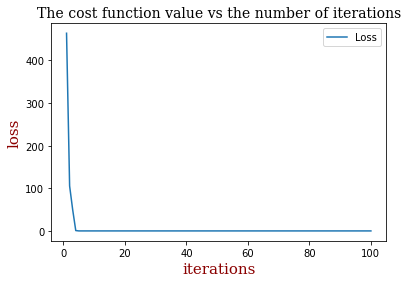

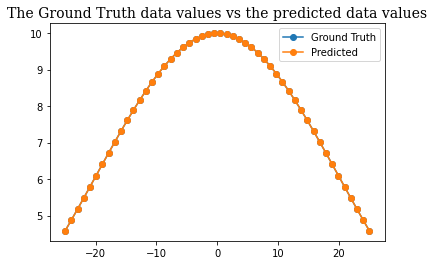

In [9]:
# Setting the paramerters 
num_iter = 100
tol = 10**(-20)
r_iter = np.arange(1, num_iter + 1,1)
ld = 0.01
# Ground Truth Values
a_gt = 10
m_gt = 0
s_gt = 20

# Set of observations
num_obs = 50
xobs = np.linspace(-25,25,num_obs)
yobs = gaussian(xobs, a_gt, m_gt, s_gt)
# Initial estimate
a0 = 10
b0 = 13
c0 = 19.12

a_pred, m_pred, s_pred, cost, stop_iter = Levenberg_Marquardt(a0, m0, s0, xobs, yobs, ld, num_iter, tol)
y_pred = gaussian(xobs, a_pred, m_pred, s_pred)
print("Pred : ", a_pred, m_pred, s_pred)
print("iter_req: ", stop_iter)
# print("Cost: ", cost[stop_iter-1])
plot1(r_iter, cost, "The cost function value vs the number of iterations", "iterations", "loss")     
plot2(xobs, yobs, y_pred, "The Ground Truth data values vs the predicted data values")     

**Questions**
   * 1. How does the choice of initial estimate and learning rate affect convergence? Observations and analysis from repeated runs with modified hyperparameters will suffice.
   * 2. Do you notice any difference between the three optimizers? Why do you think that is? (If you are unable to see a clear trend, what would you expect in general based on what you know about them)

<!-- <figure> -->
<img src='./Observations/GD.png' alt=drawing >

<!-- <figure> -->
<img src='./Observations/GN.png' alt=drawing >

<!-- <figure> -->
<img src='./Observations/LM.png' alt=drawing >

**1.**  The choice of initial estimate and learning rate affect convergence in the following ways.
* Different Initializations:
Changing initialization can have two different effects. We may get different minima if the function is not convex. It is possible to get a solution that can fit our function. If our initialization is close to that solution, we will converge at that point. We can observe in one of the test cases where final computation may change: If it is close to our solution, it will converge in fewer steps(keeping lambda same), but if it is far away, it will take more iterations. If we have an accurate initial estimate, it will quickly converge; else, it will take time.

* Learning Rate:
Learning rate is a hyper-parameter that controls how giant step we take in the direction of the loss gradient. The lower the value, the slower we travel along the downward slope and the more iterations it takes to converge to the local minima. This might cause the algorithm to get stuck in an undesirable local minimum. The same is observed from the observations compiled in the table above. While this might be a good idea in some cases (using a low learning rate), we want to ensure that we do not miss any local minima. On the other hand, using a very high learning rate might jump over minima, keep oscillating around it, and never converge.

These observations are compiled from the tables given above. 

**2.**  The general trend observed from the above three tables is compiled below. The Observations with gradient descent will be pretty straightforward with larger iteration. GD is preferred when there is noise in data. GN and LM converge with lesser iterations. Gauss Newton depends on inverse( which may not exist sometimes).
* By changing the initial estimate, Gradient Descent takes a lot of computation if the initialization is far from the expected answer. But if it is nearer to the Ground truth, then the iterations to converge are relatively reduced. This problem is handled in Gauss-Newton. It takes much lesser iterations to reach the original value. But the problem is the jacobian matrix may be singular, and the inverse may not exist at that particular value. The inverse problem is handled well using LM. The additional Lambda term ensures the existence of inverse. Also, LM removes the restriction of singularity in most cases (but there may be instances that cause it to be singular). If we change the initialization, we also end up getting different solutions for the same problem. The algorithms try to reach the function’s minima closest to initialized values.
* Gradient descent takes a relatively very high number of iterations to converge than the other two. This is because of the constant Learning rate, which does not update according to the change requirement. The two different algorithms have the change varying according to the Jacobian. The Gradient descent required a lot of computation. Gauss Newton is a better solution than gradient descent because it will converge in lesser iteration but may fail if the inverse doesn’t exist for the (J.T@J) matrix. The update rule is similar to Gauss-Newton in LM, even though it depends on the chosen parameter lambda. We observe that as lambda becomes smaller and smaller, the LM update rule tends closer to Gauss-Newton but ensures that the inverse exists in most cases. By increasing lambda, it tends to gradient descent. So a lambda range and the scale_factor for continuous update of lambda characterizes the LM algorithm. 
* If we increase the number of observations, we will get more terms in our error matrix, and we will get a better-estimated deviation of prediction from the data. This may decrease the iterations but may not give much change in computation. And your loss function will be relatively more minor. If observations are fewer, the algorithm may take time to converge because identifying the change in trend is not easy. Even if it converges, there is a higher error than for more observations. GN and LM do not improve much in terms of convergence when the number of observations increases or decreases. But too few observations may cause the algorithm to take more time to converge because identifying the change in trend is not easy. Even if it converges, there is a more significant error than for more observations.


# 2. Iterative Closest Point

In this subsection, we will code the Iterative Closest Point algorithm to find the alignment between two point clouds without known correspondences. The point cloud that you will be using is the same as the one that you used in Assignment 1.

## 2.1: Procrustes alignment

1. Write a function that takes two point clouds as input wherein the corresponding points between the two point clouds are located at the same index and returns the transformation matrix between them.
2. Use the bunny point cloud and perform the procrustes alignment between the two bunnies. Compute the absolute alignment error after aligning the two bunnies.
3. Make sure your code is modular as we will use this function in the next sub-part.
4. Prove mathematically why the Procrustes alignment gives the best aligning transform between point clouds with known correspondences.


In [13]:
# 2.1.1

def procrustes(P1, P2):
        
    # implementing procrustes to get R, t
    mean_pc1 = np.mean(P1, axis = 1, keepdims = True)
    
    P1 -= mean_pc1
    mean_pc2 = np.mean(P2, axis = 1, keepdims = True)
    P2 -= mean_pc2
    pc1 = P1
    pc2 = P2.T
    W = pc1 @ pc2

    U, S, Vt = np.linalg.svd(W)
    
    # Rotation matrix
    R = U @ Vt
    
    #using general form of R if determinant is below zero
    s = np.array([[1,0,0],[0,1,0],[0,0, np.linalg.det(U)*np.linalg.det(Vt)]])  
    if(np.linalg.det(R)<0):
        R = U @ s @ Vt
    R = R.T
    # Translation matrix
    t = mean_pc2 - R @ mean_pc1

    # Transformation matrix
    T = np.eye(4)
    T[:3,:3] = R
    T[0,3] = t[0]
    T[1,3] = t[1]
    T[2,3] = t[2]
    T[3,:] = np.array([0,0,0,1])

    return T, R, t

In [14]:
import copy 

# transform original bunny to form a new bunny pcd

def transform_pcd_1(mesh):
    T = np.eye(4)
    T[:3, :3] = mesh.get_rotation_matrix_from_xyz((np.pi/4, np.pi/3, 0))
    T[0, 3] = 0
    T[1, 3] = 0
    T[2, 3] = 0.1
    mesh2 = copy.deepcopy(mesh).transform(T)
    pcd = np.asarray(mesh.points)
    pcd2 = np.asarray(mesh2.points)
    
    print("Actual transformation matrix: \n",T)

    return pcd.T, pcd2.T, T

def transform_pcd(P):
    P = np.asarray(P.points)
    P = P.T
    P1 = P
    
    theta = ( 30.0 / 360) * 2 * np.pi
    rot = np.array([[math.cos(theta), -math.sin(theta),0],
                     [math.sin(theta),  math.cos(theta), 0],
                     [0, 0, 1]])
    R = np.array([[1, 0,0.3],[1, 2, 1],[0, 1, 0]])

    P1 = np.dot(rot, P1)
    t = np.array([0,0,0.1])
    P1[0] += t[0]
    P1[1] += t[1]
    P1[2] += t[2]
    
    T = np.eye(4)
    T[:3,:3] = rot
    T[0,3] = t[0]
    T[1,3] = t[1]
    T[2,3] = t[2]
    T[3,:] = np.array([0,0,0,1])
    
    print("Actual transformation matrix: \n",T)
    
    return P, P1, T

In [16]:
import open3d
from open3d import *
pcd_load = open3d.io.read_point_cloud("bunny.ply")
P1,P2,F= transform_pcd(pcd_load)

err1 = np.linalg.norm(P1-P2)
T,R,t = procrustes(P1.copy(),P2.copy())
P1n = np.dot(R, P1) + t
err2 = np.linalg.norm(P2-P1n)
print("Calculated transformation matrix: \n",T)
print("initial l1 norm error",err1)
print("final l1 norm error",err2)

P2 = P2.T
P1n = P1n.T

# visualize the bunnies
pcd1 = open3d.geometry.PointCloud()
pcd1.points = open3d.utility.Vector3dVector(P1n)
pcd1.paint_uniform_color([0.1,0,0.9])
pcd2 = open3d.geometry.PointCloud()
pcd2.points = open3d.utility.Vector3dVector(P2)
pcd2.paint_uniform_color([0.9,0,0.1])
open3d.visualization.draw_geometries([pcd1,pcd2])

Actual transformation matrix: 
 [[ 0.8660254 -0.5        0.         0.       ]
 [ 0.5        0.8660254  0.         0.       ]
 [ 0.         0.         1.         0.1      ]
 [ 0.         0.         0.         1.       ]]
Calculated transformation matrix: 
 [[ 8.66025404e-01 -5.00000000e-01  8.93920572e-17 -1.38777878e-17]
 [ 5.00000000e-01  8.66025404e-01  3.69546375e-16  0.00000000e+00]
 [-2.57410130e-16 -2.86628170e-16  1.00000000e+00  1.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
initial l1 norm error 22.05645060023794
final l1 norm error 4.9568031048087776e-15


### Question 2.1 Part4

<!-- <figure> -->
<img src='./Observations/2.1_Part4/1.jpeg' alt=drawing >

<!-- <figure> -->
<img src='./Observations/2.1_Part4/2.jpeg' alt=drawing >

<!-- <figure> -->
<img src='./Observations/2.1_Part4/3.jpeg' alt=drawing >

<!-- <figure> -->
<img src='./Observations/2.1_Part4/4.jpeg' alt=drawing >

## 2.2: ICP alignment

1. Write a function that takes two point clouds as input without known correspondences and perform the iterative closest point algorithm.
2. Perform the ICP alignment between the two bunnies and plot their individual coordinate frames as done in class.
3. Does ICP always give the correct alignment? Why or Why not?
4. What are other variants of ICP and why are they helpful (you can look at point to plane ICP)?

In [17]:
from sklearn.neighbors import KDTree
def euclidean(p1, p2):
    p1 = p1.reshape(3,1)
    p2 = p2.reshape(3,1)
    return np.sqrt(np.sum(np.square(p1-p2)))

def find_closest(M1, M2):
    # find closest points using in-built KDTree algo
    M1 = M1.T
    M2 = M2.T
    kdt = KDTree(M2)
    dist, ind = kdt.query(M1)
    return dist.T, ind.T[0]

def find_nearest(array, value):
    array = np.asarray(array.T)
    idx = (np.linalg.norm(array - value, axis=1)**2).argmin()
    return idx
 
def find_correspondences(P1, P2):
    dist, ind1 = find_closest(P1,P2)
    return P1, P2[:,ind1]
#     n = P2.shape[1]
#     arr = np.zeros(n)
#     # find modified P2
#     P_new = np.empty((0,3))
#     ind1 = []
#     for i in range(n):
#         ind = find_nearest(P2, P1[:,i]) #find point in P2 closest from P1[:,i]
#         ind1.append(ind)
    
#     P_new = P_new.T

def mean_dist(A, B):
    dist = 0
    for i in range(A.shape[1]):
        dist += euclidean(A[:,i],B[:,i])
    dist /= A.shape[1]
    return dist

In [18]:
def visualize(PC1,PC2,c1,c2):
    PC1 = PC1.T
    PC2 = PC2.T
    pcd1 = open3d.geometry.PointCloud()
    pcd1.points = open3d.utility.Vector3dVector(PC1)
    pcd1.paint_uniform_color([0.1,0,0.9])
    pcd2 = open3d.geometry.PointCloud()
    pcd2.points = open3d.utility.Vector3dVector(PC2)
    pcd2.paint_uniform_color([0.9,0,0.1])
#     coord_frame1 = open3d.geometry.TriangleMesh.create_coordinate_frame(
#         size=0.1, origin=np.mean(PC1, axis=0))
#     coord_frame1.transform(TT)
#     coord_frame2 = open3d.geometry.TriangleMesh.create_coordinate_frame(
#         size=0.1, origin=np.mean(PC2, axis=0))
#     coord_frame2.transform(x)
    open3d.visualization.draw_geometries([pcd1,pcd2,c1,c2])

In [19]:
def icp_algo(P1,P2,c1,c2):
    tolerance = 1e-10
    P1n = copy.deepcopy(P1)
    transform = np.eye(4)
    dist, ind = find_closest(P1,P2)   # get distances and indices of the points closest to P1 from points in P2
    preverr = np.mean(np.square(dist))
    preverr1 = np.linalg.norm(P1-P2)
    print("Initial:  Mean distance Error:",preverr, " L1 Norm error:",preverr1)
    for iter in range(100):
#         P1n, P2n = find_correspondences(P1n, P2)    # get modified P2 matrix
        P2n = P2[:,ind]   # rearrange P2 matrix using the ind array
        T, R, t = procrustes(P1n.copy(),P2n.copy())
        transform = transform @ np.linalg.inv(T)
        P1n = np.dot(R, P1n) + t    # update P1n for next iteration
        c1 = c1.transform(T)
        
            
        err1 = np.linalg.norm(P1n-P2)
        dist, ind = find_closest(P1n,P2)
        err = np.mean(np.square(dist))
        print("Iteration:",iter+1," Mean distance Error:",err, " L1 Norm error:",err1)
        if(err<tolerance):
            # display bunnies before breaking
            visualize(P1n.copy(), P2.copy(),c1,c2)
            break
        
        #visualize bunnies
        if not (iter)%5:
            visualize(P1n.copy(), P2.copy(),c1,c2)
    
    # obtain rotation matrix using final P2 which is arranged in order of correspondence
    T, R, t = procrustes(P1.copy(), P2n.copy())
    print("\ncalculated transformation matrix:\n", T)
        
    return P1.copy(), P2n.copy()

In [20]:
pcd_load = open3d.io.read_point_cloud("bunny.ply")
downpcd = pcd_load.uniform_down_sample(50)
P1,P2, TT= transform_pcd(downpcd)
coord_frame1 = open3d.geometry.TriangleMesh.create_coordinate_frame(
    size=0.1, origin=np.mean(P1.T, axis=0))
coord_frame2 = open3d.geometry.TriangleMesh.create_coordinate_frame(
    size=0.1, origin=np.mean(P2.T, axis=0))
#when we take mean it already got translated, so we only rotate here
coord_frame2 = coord_frame2.rotate(TT[:3,:3])
P1f, P2f = icp_algo(P1.copy(), P2.copy(), coord_frame1, coord_frame2)

Actual transformation matrix: 
 [[ 0.8660254 -0.5        0.         0.       ]
 [ 0.5        0.8660254  0.         0.       ]
 [ 0.         0.         1.         0.1      ]
 [ 0.         0.         0.         1.       ]]
Initial:  Mean distance Error: 0.005895602004107446  L1 Norm error: 3.1301139199090575
Iteration: 1  Mean distance Error: 0.0007955086776288451  L1 Norm error: 1.4717224837372194
Iteration: 2  Mean distance Error: 0.0004185510900109439  L1 Norm error: 1.120022222883032
Iteration: 3  Mean distance Error: 0.0002666843367137333  L1 Norm error: 0.930228879379267
Iteration: 4  Mean distance Error: 0.00019570265059229284  L1 Norm error: 0.8084873403491469
Iteration: 5  Mean distance Error: 0.00016140504862299386  L1 Norm error: 0.7242255937926063
Iteration: 6  Mean distance Error: 0.00014006606035300026  L1 Norm error: 0.6529741990864083
Iteration: 7  Mean distance Error: 0.0001261854102515487  L1 Norm error: 0.5965974738151767
Iteration: 8  Mean distance Error: 0.0001171123

**3.**
ICP doesn't always give the correct alignment. The basic idea behind ICP is that if we somehow knew correspondences, we could solve for the translation that minimizes pairwise distance. ICP makes a seemingly radical guess that the closest points are the correspondences. Since we are considering the closest points, incorrect pairs may be matched when points are very close together or if the transformation between the two point clouds is very large. The convergence of the algorithm also depends on the initial correspondences. For very incorrect initial correspondence, the ICP algorithm may not converge. If we start "close enough", ICP converges and gives a transformation matrix close to the ground truth. Another reason for incorrect alignment is that ICP is sensitive to outliers or noise present in the initial point cloud which may cause incorrect alignments.

**4.** Other variants of ICP include:
1. Selecting sample points (from one or both meshes)
Methods like normal sampling leads to faster convergence, and it is also low-cost and simple. Other variations include uniform sub-sampling, random sampling, etc
2. Matching to points in the other mesh
Usually closest point matching is done. Methods like projection-based matching can align to point clouds in milli-seconds as opposed to a few seconds in the case of closest point.
3. Weighting the correspondences
This includes methods like constant weights, lower weights for higher distance pairs, weights based on normal compatibility, weights based on uncertainty, etc. Weights based on normal compatibility and uncertainty tend to converge faster.
4. Rejecting certain (outlier) point pairs
5. Assigning an error metric to the current transform
6. Minimizing the error metric w.r.t. transformation
Using point-to-plane distance instead of point-to-point lets flat regions slide along each other. Point-to-plane is better as it is faster and more likely to converge at the minima i.e. it is more robust.

These variants improve various aspects of performance of ICP including speed, stability(local minima), tolerance wrt. noise and outliers, basin of convergence(maximum initial misalignment)